<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  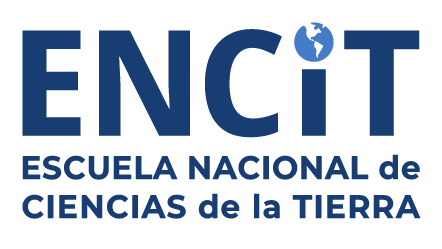
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 2: Manejo de datos</span><br/>
  <span style="color:DodgerBlue; font-size:140%;">Análisis exploratorio de datos </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen">  Análisis exploratorio de datos </font>**

El análisis exploratorio de datos (AED), o EDA por sus siglas en inglés, es una fase inicial en el análisis de datos que utiliza visualizaciones y estadísticas para investigar y comprender las características principales de un conjunto de datos, buscando patrones, valores atípicos y relaciones entre variables. Su objetivo es explorar la estructura de los datos, la calidad y la presencia de anomalías, no confirmar una hipótesis estadística preexistente. Es un proceso creativo y de descubrimiento que sirve como paso previo esencial antes de realizar un análisis estadístico o creación de modelos más complejos. 

## **<font color="SeaGreen"> Variables Hidrogeoquímicas de Pozos de Agua </font>**

El agua subterránea es un recurso vital que soporta tanto los ecosistemas naturales como el desarrollo humano. La calidad del agua subterránea es influenciada por procesos hidrogeoquímicos que ocurren en el subsuelo, lo que afecta su composición química y, por ende, su uso para consumo humano, agrícola e industrial. La evaluación detallada de las características hidrogeoquímicas del agua subterránea es esencial para su gestión sostenible y protección. Este proyecto se enfoca en analizar las variables hidrogeoquímicas de pozos de agua, incluyendo temperatura '$T$', '$pH$', potencial de óxido-reducción ('$Eh$'), y concentraciones de iones como '$Na^+$', '$K^+$', '$Ca_2^+$', '$HCO_3^-$', '$SO_4^{2-}$', '$Cl^-$' y '$SiO_2$'.

El objetivo es llevar a cabo un análisis exploratorio de datos (AED) para entender las relaciones entre estas variables y cómo podrían influir en la calidad del agua subterránea.


In [1]:
import pandas as pd
import seaborn as sns #gráficas
import matplotlib.pyplot as plt #gráficas
import numpy as np
# Para calcular la distancia de Mahalanobis
import matplotlib.gridspec as gridspec

In [3]:
# carga de archivo csv
df=pd.read_csv('Datos_Jaral_PreFinal.csv')
df.head()
#no puede hacer operaciones pq se tienen palabras en las columnas donde hay números

,No,Localidad,Tipo,Clase Temp,T,pH,Eh,Na+,K+,Ca2+,HCO3 lab,SO42-,Cl-,SiO2
0,NaN,NaN,NaN,NaN,°C,NaN,mV,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L
1,1.0,EL Huizache,pozo,Temperatura baja,28.40,7.87,154.5,52.7,1.75,9.59,164.21,14.33,6.71,54.7
2,2.0,Santa Rosa,pozo,Temperatura baja,36.3,7.71,170.8,62.82,2.48,8.09,169.94,16.57,7.61,67.15
3,3.0,Santa Catarina,pozo,Temperatura baja,33.3,7.68,160.5,72.23,3.63,11.24,199.22,16.92,8.29,81.35
4,4.0,Ejido El Palomo,pozo,Temperatura baja,37.7,8.03,158.1,56.03,2.28,11.66,160.58,17.12,6.87,68.26


In [4]:
df.columns #cómo se llaman todas las columnas

Index(['No ', 'Localidad', 'Tipo', 'Clase Temp', 'T', 'pH', 'Eh', 'Na+', 'K+',
       'Ca2+ ', 'HCO3 lab', 'SO42- ', 'Cl- ', 'SiO2'],
      dtype='object')

In [5]:
df['T'].dtype

dtype('O')

In [8]:
df.info() #columnas que tenemos. cuantos valores nulos y el tipo de datos que corresponde a cada una de las variables
#object es strings,y necesitamos que T sea número 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          126 non-null    float64
 1   Localidad   126 non-null    object 
 2   Tipo        126 non-null    object 
 3   Clase Temp  126 non-null    object 
 4   T           127 non-null    object 
 5   pH          126 non-null    float64
 6   Eh          127 non-null    object 
 7   Na+         127 non-null    object 
 8   K+          127 non-null    object 
 9   Ca2+        127 non-null    object 
 10  HCO3 lab    127 non-null    object 
 11  SO42-       127 non-null    object 
 12  Cl-         127 non-null    object 
 13  SiO2        127 non-null    object 
dtypes: float64(2), object(12)
memory usage: 14.0+ KB


### **<font color="SeaGreen"> Organizacion y limpieza de datos </font>**

Los datos completos tienen una dimensión de **127 filas** y **14 columnas**. Dentro de los cuales hay registro de 126 informacion de cuerpos de agua. Las columnas tienen una estructura de:
**Columnas**:
- **Localidad** nombre de la ubicación del cuerpo de agua
- El **Tipo** de cuerpo de agua entre pozos, manatiales, norias, presas.
- La **Clase de Temp** variable categorica que define el grado de la temperatura del agua en baja, media y alta
- **T** = Valor de la Temperatura (°$C$)
- **pH** = Valor de la concentración de potencial de hidrogeno, medida de la acidez o alcalinidad de una solución acuosa
- **Eh** = potencial de óxido-reducción
- **Na+** = Concentración del ión sodio ($mg/L$)
- **K+** =  Concentración del ión potasio ($mg/L$)
- **Ca2** =  Concentración del ión calcio ($mg/L$)
- **HC03** = Concentración del ión bicarbonato ($mg/L$)
- **SO42-** = Concentración del ión Sulfato ($mg/L$)
- **Cl-** = Concentración del ión Cloro ($mg/L$)
- **SiO2** = Concentración del ión Silice ($mg/L$)

**Limpieza y transformación de datos**

1. Es necesario hacer la limpieza de la primera fila de datos con índice 0 que contiene unidades de las variables.
2. Las columnas necesitan limpieza dado que tienen espacios extras
3. Es importante definir previamente los tipos de datos para cada variable colocando valores de tipo float, int y string respectivamene



In [11]:
# 1. Limpieza del indice 0 por no contener información de pozo
df = df[1:].reset_index(drop=True) #se quita la primera fila

# 2. Strip del nombre las columnas
df.columns = [col.strip() for col in df.columns]
print(f'Nombre de columnas limpias: {df.columns.to_list()}')
df.rename(columns ={'HCO3 lab':'HCO3-'}, inplace= True) #se cambia el nombre de HC03 lab a HCO3-

Nombre de columnas limpias: ['No', 'Localidad', 'Tipo', 'Clase Temp', 'T', 'pH', 'Eh', 'Na+', 'K+', 'Ca2+', 'HCO3 lab', 'SO42-', 'Cl-', 'SiO2']


In [12]:
df.head()

,No,Localidad,Tipo,Clase Temp,T,pH,Eh,Na+,K+,Ca2+,HCO3-,SO42-,Cl-,SiO2
0,1.0,EL Huizache,pozo,Temperatura baja,28.40,7.87,154.5,52.7,1.75,9.59,164.21,14.33,6.71,54.7
1,2.0,Santa Rosa,pozo,Temperatura baja,36.3,7.71,170.8,62.82,2.48,8.09,169.94,16.57,7.61,67.15
2,3.0,Santa Catarina,pozo,Temperatura baja,33.3,7.68,160.5,72.23,3.63,11.24,199.22,16.92,8.29,81.35
3,4.0,Ejido El Palomo,pozo,Temperatura baja,37.7,8.03,158.1,56.03,2.28,11.66,160.58,17.12,6.87,68.26
4,5.0,San Bartolo de Berrios,pozo,Temperatura baja,39.1,7.87,138,59.18,3.17,12.02,177.7,18.63,7.35,74.94


In [13]:
for i in df:
    print(df[i].unique()) #pone los valores únicos

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.]
['EL Huizache' 'Santa Rosa' 'Santa Catarina' 'Ejido El Palomo'
 'San Bartolo de Berrios' 'San José de Rancho Nuevo'
 'Próximo a Agua Blanca' 'Rancho El Dorado' 'Rancho El Pájaro Azul'
 'Rancho EL Perdón' 'Rancho El Perdón' 'Las Margaritas'
 'Invernaderos Payán' 'Lequeitio' 'La profecía, exhacienda de lequeito'
 'El Xilantro' 'La noria de San Teodoro' 'El Jar

In [14]:
# 3. Actualizar solo las filas donde la primera letra esté en mayúscula
df.loc[df['Tipo'].str.istitle(), 'Tipo'] = df['Tipo'].str.lower() #cpnsidere el tipo y ponga todas en minúsculas

In [16]:
df['Tipo'].unique()

array(['pozo', 'manantial', 'noria', 'presa'], dtype=object)

In [17]:
# 4. Conversipn del tipo de dato
conversiones = {#diccionario donde a cada llave se le pone el tipo de variable que se quieres
    'No': 'int',
    'T': 'float64',
    'pH': 'float64',
    'Eh': 'float64',
    'Na+': 'float64',
    'K+': 'float64',
    'Ca2+': 'float64',
    'HCO3-': 'float64',
    'SO42-': 'float64',
    'Cl-': 'float64',
    'SiO2': 'float64',
    'Clase Temp': 'category',
    'Tipo':'category'
}
# Aplicando la conversión de tipos de acuerdo al diccionario
df = df.astype(conversiones)
df.head()

,No,Localidad,Tipo,Clase Temp,T,pH,Eh,Na+,K+,Ca2+,HCO3-,SO42-,Cl-,SiO2
0,1,EL Huizache,pozo,Temperatura baja,28.4,7.87,154.5,52.70,1.75,9.59,164.21,14.33,6.71,54.70
1,2,Santa Rosa,pozo,Temperatura baja,36.3,7.71,170.8,62.82,2.48,8.09,169.94,16.57,7.61,67.15
2,3,Santa Catarina,pozo,Temperatura baja,33.3,7.68,160.5,72.23,3.63,11.24,199.22,16.92,8.29,81.35
3,4,Ejido El Palomo,pozo,Temperatura baja,37.7,8.03,158.1,56.03,2.28,11.66,160.58,17.12,6.87,68.26
4,5,San Bartolo de Berrios,pozo,Temperatura baja,39.1,7.87,138.0,59.18,3.17,12.02,177.70,18.63,7.35,74.94


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   No          126 non-null    int64   
 1   Localidad   126 non-null    object  
 2   Tipo        126 non-null    category
 3   Clase Temp  126 non-null    category
 4   T           126 non-null    float64 
 5   pH          126 non-null    float64 
 6   Eh          126 non-null    float64 
 7   Na+         126 non-null    float64 
 8   K+          126 non-null    float64 
 9   Ca2+        126 non-null    float64 
 10  HCO3-       126 non-null    float64 
 11  SO42-       126 non-null    float64 
 12  Cl-         126 non-null    float64 
 13  SiO2        126 non-null    float64 
dtypes: category(2), float64(10), int64(1), object(1)
memory usage: 12.5+ KB


ordinal- se pueden ordenar
nominal- no se pueden ordenar

discretas- no. enteros o categorías
continua- no. reales
media, moda y mediana coinciden entonces son

### **<font color="SeaGreen"> Análisis estadístico básico </font>**
#### ¿Qué hacen las estadísticas descriptivas?

* Organizar y resumir: Transforman datos crudos en información comprensible. 
* Presentar información: Utilizan tablas, gráficos, diagramas y valores clave como promedios y porcentajes para resumir las características de un conjunto de datos. 
* Describir características: Muestran dónde se ubica el "centro" de los datos y cómo se distribuyen o varían los valores. 

#### **<font color="blue"> Medidas de tendencia central: Indican la ubicación central de los datos. </font>** 
1.  **Media**: El promedio aritmético de un conjunto de datos. 
2.  **Mediana**: El valor medio cuando los datos están ordenados. 
3.  **Moda**: El valor que aparece con más frecuencia en los datos.
4.  **Cuartiles**: Dividen al conjunto de datos en partes iguales. (se dividen los datos en 4)
       * $q_{25}$: Valor por debajo del cual esta el 25% de los datos.
       * $q_{50}$: Mediana
       * $q_{75}$: Valor por debajo del cual esta el 75% de los datos.
5. **Simetría o sesgo**: si la media, moda y mediana de una distribución de datos coinciden, entonces es simétrica. De lo contrario podemos tener:
     * Sesgo positivo: Media > Mediana > Moda
     * Sesgo negativo: Media < Mediana < Moda

#### **<font color="blue"> Medidas de dispersión: Muestran la variabilidad o la dispersión de los datos. </font>** 

1.  **Rango**: La diferencia entre el valor máximo y mínimo. 
2.  **Desviación estándar**: Mide cuánto se alejan los datos del promedio.  raiz cuadrada de la varianza
3.  **Varianza**: Representa el promedio de las distancias al cuadrado entre los datos y su media.
4.  **Rango intercuartil (IQR)**: $q_{75}-q_{25}$
 


In [19]:
# Definir variables de las cuales se hará el AED.
VariablesNumAnalis = ['T', 'pH', 'Eh', 'Na+', 'K+', 'Ca2+', 'HCO3-', 'SO42-', 'Cl-', 'SiO2'] #eligiendo variables numéricas

for i in VariablesNumAnalis: #ciclo que obtiene el promedio de cada una de estas variables
    print(i , 'promedio =' ,df[i].mean())

T promedio = 30.769841269841272
pH promedio = 7.432301587301587
Eh promedio = 196.11111111111111
Na+ promedio = 62.92555555555556
K+ promedio = 9.293333333333331
Ca2+ promedio = 25.8065873015873
HCO3- promedio = 200.57849206349206
SO42- promedio = 23.748809523809527
Cl- promedio = 17.90365079365079
SiO2 promedio = 90.45706349206348


In [20]:
for i in VariablesNumAnalis:#obtiene moda de los datos
    print(i , 'moda =' ,df[i].mode())

T moda = 0    27.7
1    31.6
Name: T, dtype: float64
pH moda = 0    7.71
1    7.78
Name: pH, dtype: float64
Eh moda = 0    244.0
Name: Eh, dtype: float64
Na+ moda = 0    59.0
1    64.0
2    68.0
Name: Na+, dtype: float64
K+ moda = 0     2.8
1     3.9
2    11.9
Name: K+, dtype: float64
Ca2+ moda = 0    18.3
1    19.9
2    20.5
3    20.9
4    42.6
5    49.0
Name: Ca2+, dtype: float64
HCO3- moda = 0    201.91
Name: HCO3-, dtype: float64
SO42- moda = 0    20.0
Name: SO42-, dtype: float64
Cl- moda = 0    12.34
Name: Cl-, dtype: float64
SiO2 moda = 0     75.11
1     93.30
2     95.23
3    103.36
4    105.50
5    109.35
6    111.07
Name: SiO2, dtype: float64


In [ ]:
for i in VariablesNumAnalis:
    print(i , 'mediana =' ,df[i].median())


<div class="alert alert-block alert-info">
<b>Nota:</b> Pandas tiene la funcion describe(), pero no contiene todos los estadisticos.
</div>


In [22]:
df[VariablesNumAnalis].describe() #conteo de los valores, cual es el promedio, desviacion estandar, el minimo,el máximo, los cuartiles 25 y 75

,T,pH,Eh,Na+,K+,Ca2+,HCO3-,SO42-,Cl-,SiO2
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,30.769841,7.432302,196.111111,62.925556,9.293333,25.806587,200.578492,23.748810,17.903651,90.457063
std,6.001910,0.515223,65.496708,23.134325,8.019617,15.757429,73.261656,17.416653,30.949184,20.096230
min,19.400000,5.800000,30.100000,4.000000,1.750000,1.800000,8.000000,1.070000,2.980000,17.100000
25%,26.300000,7.132500,153.200000,56.115000,3.900000,16.625000,170.167500,15.917500,9.107500,74.995000
50%,29.900000,7.490000,196.000000,62.525000,7.150000,21.490000,198.400000,19.245000,12.050000,92.250000
75%,35.275000,7.760000,244.000000,68.000000,10.990000,31.767500,221.750000,23.945000,14.997500,107.145000
max,42.800000,8.610000,499.000000,215.820000,40.200000,90.900000,535.720000,122.500000,280.600000,134.390000


In [ ]:
df['Clase Temp'].describe()

##### Para obtener un resumen estadístico más completo, podemos definir la siguiente función.

In [20]:
def estadigrafos(df, VariableName): #necesita un data frame y nombre de variables
    """
    Calcula estadísticas descriptivas básicas para una columna específica de un DataFrame.

    Parámetros:
    - df (pandas.DataFrame): DataFrame que contiene los datos.
    - VariableName (str): Nombre de la columna para la cual calcular las estadísticas.

    Retorna:
    - pandas.DataFrame: DataFrame con las estadísticas de la columna especificada.
    """
    # Calcula las estadísticas deseadas
    minim = df[VariableName].min()
    Q1 = df[VariableName].quantile(0.25)
    prome = df[VariableName].mean()
    Q2 = df[VariableName].median()
    Q3 = df[VariableName].quantile(0.75)
    maxim = df[VariableName].max()
    varia = df[VariableName].var()
    desvi = df[VariableName].std()
    rango = maxim - minim
    IQR = Q3 - Q1 #rango intercuartil
    coefv = desvi / prome if prome != 0 else np.nan  # Previene división por cero
    simetria = df[VariableName].skew()
    curtosis = df[VariableName].kurtosis() # que tan achatada está la distribución

    # Crea un DataFrame con los resultados
    estadisticas = pd.DataFrame({
        VariableName: [minim, Q1, prome, Q2, Q3, maxim, varia, desvi, rango, IQR, coefv, simetria, curtosis]
    }, index=['Mínimo', 'Primer Cuartil', 'Promedio', 'Mediana', 'Tercer Cuartil', 'Máximo', 'Varianza', 'Desviación Estandar', 'Rango', 'IQR', 'Coeficiente de variación', 'Simetria', 'Curtosis'])

    return estadisticas.round(2) #redondeado a 2
#moda se hace por separado, pues puede tener más de un valor

In [25]:
VariablesNumAnalis = ['T', 'pH', 'Eh', 'Na+', 'K+', 'Ca2+', 'HCO3-', 'SO42-', 'Cl-', 'SiO2']

estadisticas = pd.DataFrame()
for variable in VariablesNumAnalis:
    df_est = estadigrafos(df, variable)
    estadisticas = pd.concat([estadisticas, df_est], axis = 1)

estadisticas

,T,pH,Eh,Na+,K+,Ca2+,HCO3-,SO42-,Cl-,SiO2
Mínimo,19.40,5.80,30.10,4.00,1.75,1.80,8.00,1.07,2.98,17.10
Primer Cuartil,26.30,7.13,153.20,56.12,3.90,16.62,170.17,15.92,9.11,75.00
Promedio,30.77,7.43,196.11,62.93,9.29,25.81,200.58,23.75,17.90,90.46
Mediana,29.90,7.49,196.00,62.52,7.15,21.49,198.40,19.24,12.05,92.25
Tercer Cuartil,35.28,7.76,244.00,68.00,10.99,31.77,221.75,23.94,15.00,107.14
Máximo,42.80,8.61,499.00,215.82,40.20,90.90,535.72,122.50,280.60,134.39
Varianza,36.02,0.27,4289.82,535.20,64.31,248.30,5367.27,303.34,957.85,403.86
Desviación Estandar,6.00,0.52,65.50,23.13,8.02,15.76,73.26,17.42,30.95,20.10
Rango,23.40,2.81,468.90,211.82,38.45,89.10,527.72,121.43,277.62,117.29
IQR,8.97,0.63,90.80,11.88,7.09,15.14,51.58,8.03,5.89,32.15


#### **<font color="blue"> Histogramas y digrama de caja y bigotes (boxplots) </font>** 


![his-box.png](his-box.png)

**Histogramas** o gráficos de barras: Son una representación gráfica de la distribución de frecuencias de un conjunto de valores numéricos. 

De un histograma podemos obtener:
* Rangos de valores
* Asimetría o sesgo
* Intervalos de valores con frecuencias máximas
* Datos atípicos (es atípico si $dato<q_{0.25}-1.5*IQR$ o si $dato>q_{0.75}+1.5*IQR$)
* Dispersión

In [26]:
def HistBox(variables, df):
    plt.figure(figsize=(20, 20))
    outer_grid = gridspec.GridSpec(6, 2, wspace=0.2, hspace=0.4)
    custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
    sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
    sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})

    for i, variable in enumerate(variables):
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                      subplot_spec=outer_grid[i],
                                                      height_ratios=[4, 1],
                                                      hspace=0.02)  # Ajustado para minimizar el espacio entre histogramas y boxplots

        # Histograma
        ax_hist = plt.Subplot(plt.gcf(), inner_grid[0])
        sns.histplot(df[variable], kde=True, stat='density', color='yellowgreen', ax=ax_hist)
        ax_hist.set_title(variable)
        ax_hist.set_xlabel('')  # Mantener esto para limpieza
        plt.gcf().add_subplot(ax_hist)
        ax_hist.tick_params(axis='x',          # Cambios para ocultar solo los ticks (no las etiquetas, que ya están ocultas)
                            which='both',      # Afecta a ticks mayores y menores
                            bottom=False,      # Oculta ticks inferiores
                            top=False,         # Oculta ticks superiores (si estuvieran visibles)
                            labelbottom=False) # Oculta las etiquetas de los ticks inferiores
        # Calcula y anota estadísticas
        mean = df[variable].mean()
        median = df[variable].median()
        mode = df[variable].mode()[0]  # Moda
        max_value = df[variable].max()
        min_value = df[variable].min()

        # Agrega líneas verticales para cada estadística
        lines = [
            ax_hist.axvline(mean, color='red', linestyle='dashed', linewidth=2),
            ax_hist.axvline(median, color='green', linestyle='dashed', linewidth=2)#,
        ]

        ax_hist.grid(True)

        # Boxplot
        ax_box = plt.Subplot(plt.gcf(), inner_grid[1], sharex=ax_hist)
        sns.boxplot(x=df[variable], ax=ax_box, color='lightgreen', showmeans=True,
                    meanprops={"marker":"o", "markerfacecolor":'red',
                               "markeredgecolor":"gray", "markersize":"10"})
        ax_box.set_xlabel('')
        ax_box.tick_params(axis='x',          # Cambios para ocultar solo los ticks (no las etiquetas, que ya están ocultas)
                            which='both',      # Afecta a ticks mayores y menores
                            bottom=True,      # Oculta ticks inferiores
                            top=True,         # Oculta ticks superiores (si estuvieran visibles)
                            labelbottom=True)
        plt.gcf().add_subplot(ax_box)

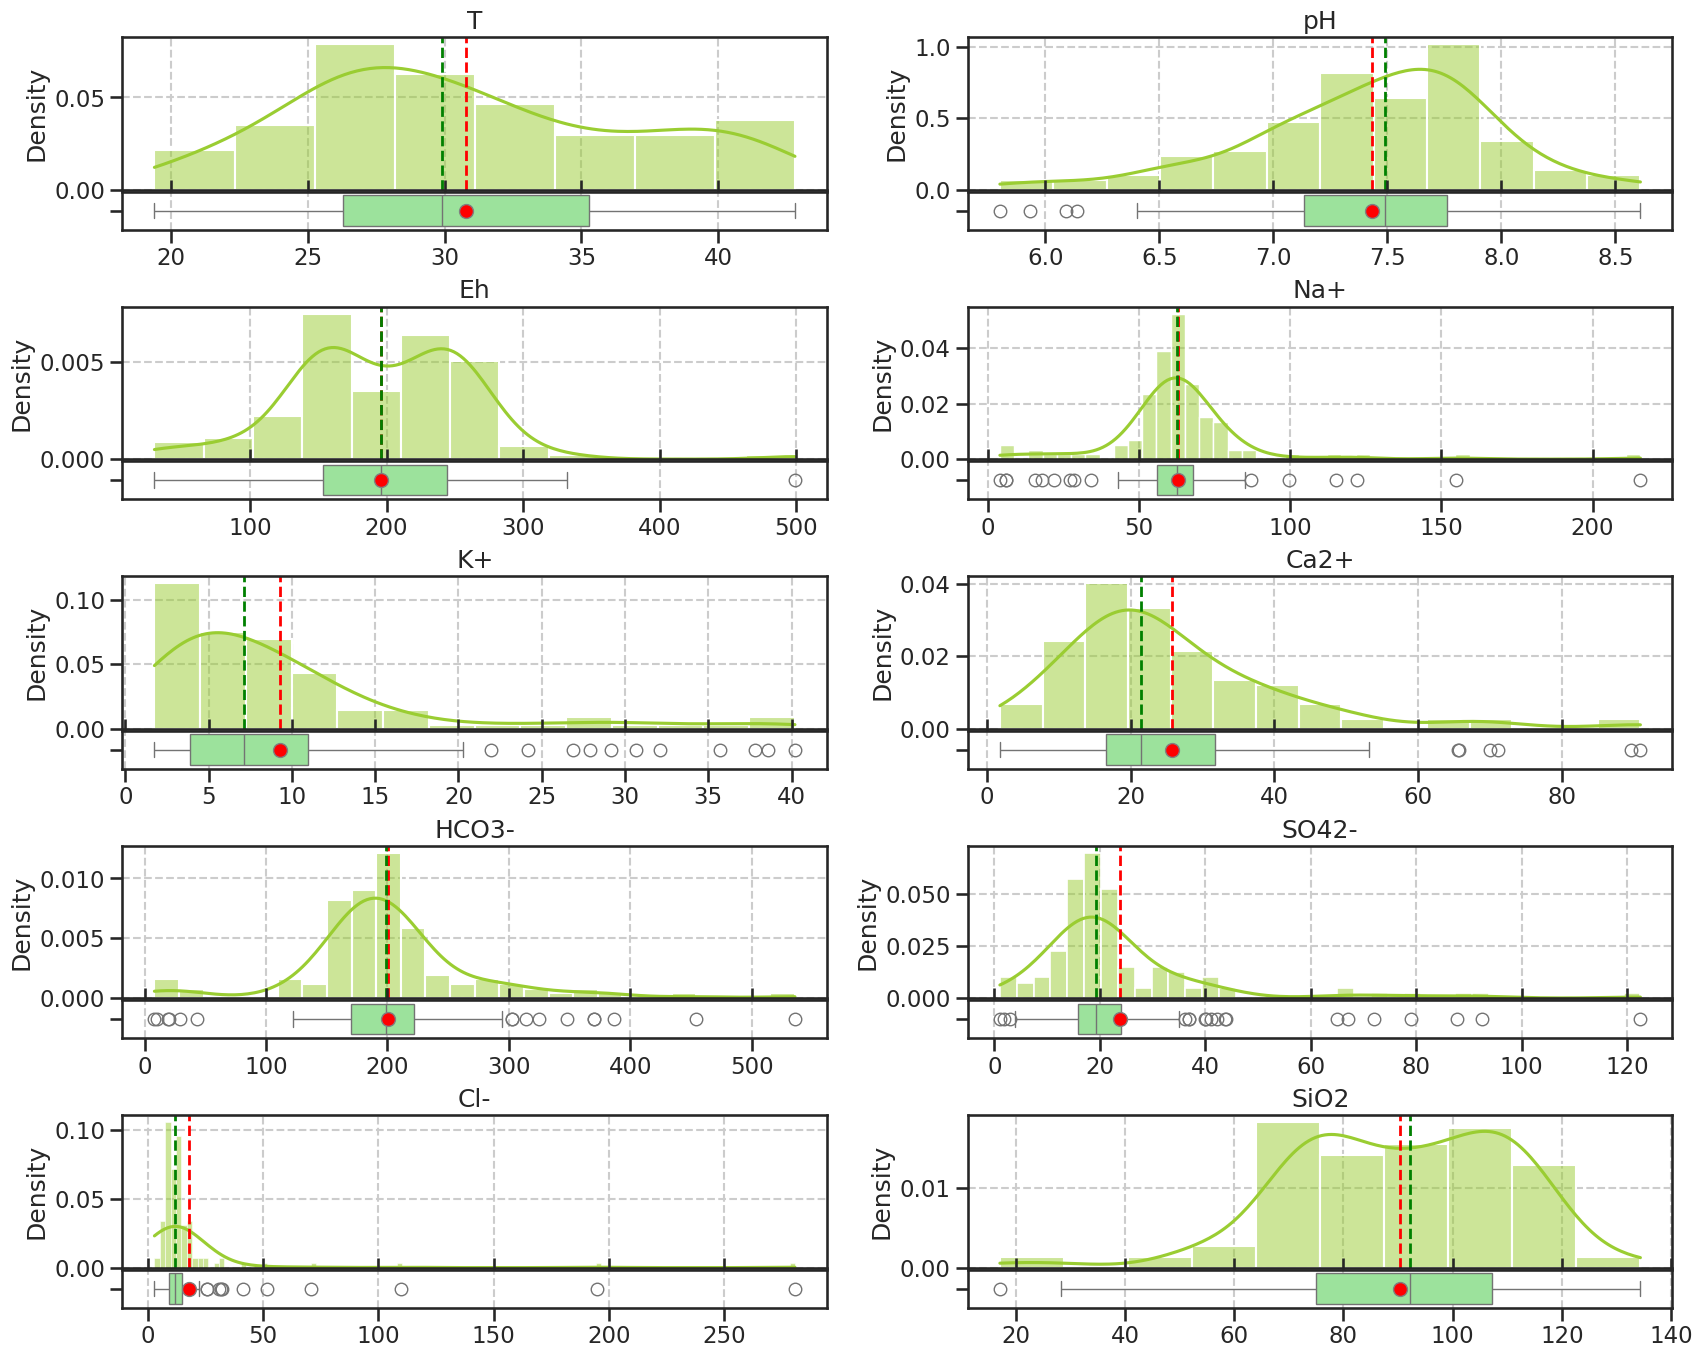

In [27]:
HistBox(VariablesNumAnalis, df) # círculos grises son valores atípicos

#### **<font color="blue"> AED para variable categóricas </font>** 

Para las variables contínuas se pueden obtener varias medidas que describan los datos, para el caso de variables categóricas la cosa cambia un poco.


<div class="alert alert-block alert-info">
<b>Nota:</b> Para hacer el AED, deben separar las variables numéricas contínuas de las variables categóricas.
</div>


In [28]:
df.describe() # no muestra las variables categóricas

,No,T,pH,Eh,Na+,K+,Ca2+,HCO3-,SO42-,Cl-,SiO2
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,63.500000,30.769841,7.432302,196.111111,62.925556,9.293333,25.806587,200.578492,23.748810,17.903651,90.457063
std,36.517119,6.001910,0.515223,65.496708,23.134325,8.019617,15.757429,73.261656,17.416653,30.949184,20.096230
min,1.000000,19.400000,5.800000,30.100000,4.000000,1.750000,1.800000,8.000000,1.070000,2.980000,17.100000
25%,32.250000,26.300000,7.132500,153.200000,56.115000,3.900000,16.625000,170.167500,15.917500,9.107500,74.995000
50%,63.500000,29.900000,7.490000,196.000000,62.525000,7.150000,21.490000,198.400000,19.245000,12.050000,92.250000
75%,94.750000,35.275000,7.760000,244.000000,68.000000,10.990000,31.767500,221.750000,23.945000,14.997500,107.145000
max,126.000000,42.800000,8.610000,499.000000,215.820000,40.200000,90.900000,535.720000,122.500000,280.600000,134.390000


In [29]:
df.columns

Index(['No', 'Localidad', 'Tipo', 'Clase Temp', 'T', 'pH', 'Eh', 'Na+', 'K+',
       'Ca2+', 'HCO3-', 'SO42-', 'Cl-', 'SiO2'],
      dtype='object')

In [30]:
VariablesCatAnalis = ['Tipo', 'Clase Temp']

In [35]:
df[VariablesCatAnalis].describe() #aquí ya :)  frecuencia absoluta- no. de veces que se repite cada una de las observaciones   frecuencia relativa- frecuencia absoluta dividido por el no, de observacioes, probabilidad

,Tipo,Clase Temp
count,126,126
unique,4,3
top,pozo,Temperatura baja
freq,119,93


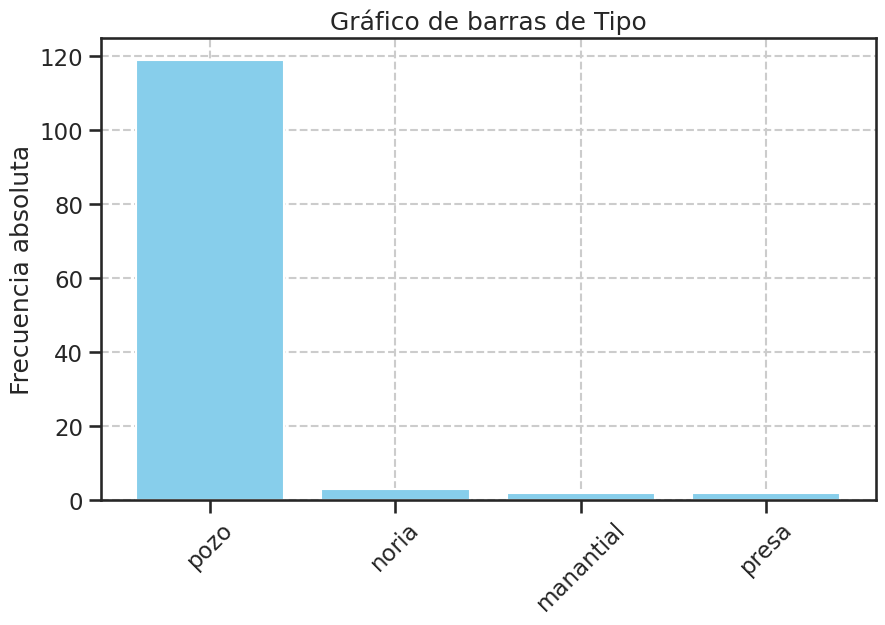

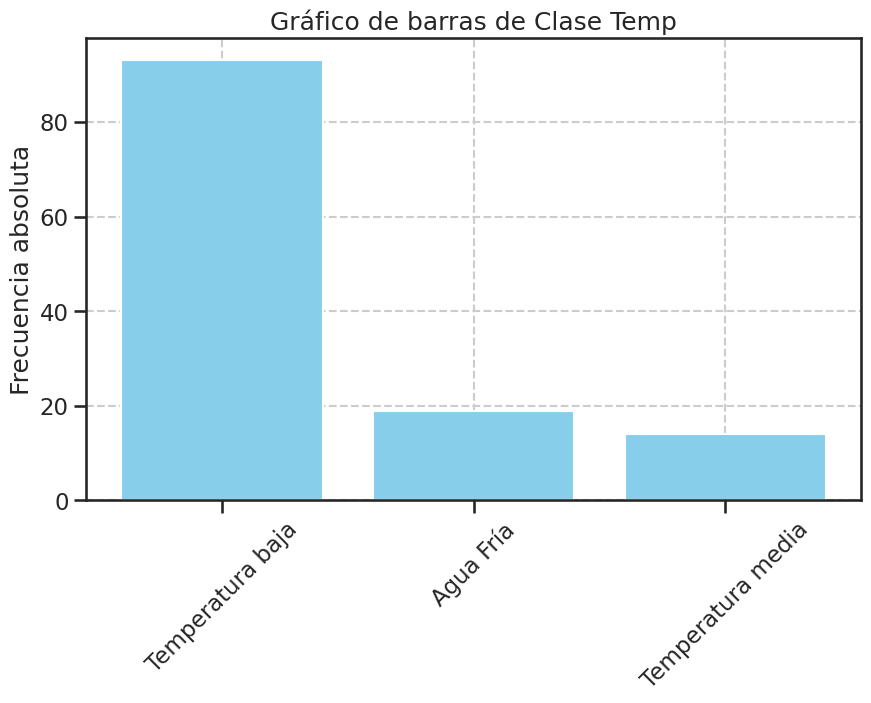

In [33]:
for i in VariablesCatAnalis:
    plt.figure(figsize=(10, 6))
    conteo = df[i].value_counts()
    plt.bar(conteo.index, conteo.values, color='skyblue')
    plt.ylabel('Frecuencia absoluta')
    plt.title('Gráfico de barras de ' + i)
    plt.xticks(rotation=45)  # opcional, mejora la legibilidad
    plt.show()

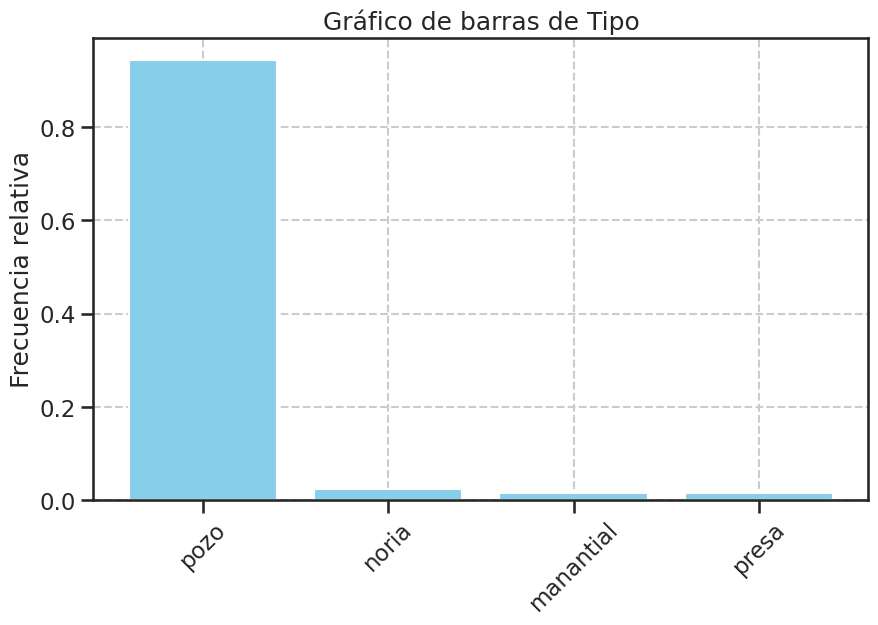

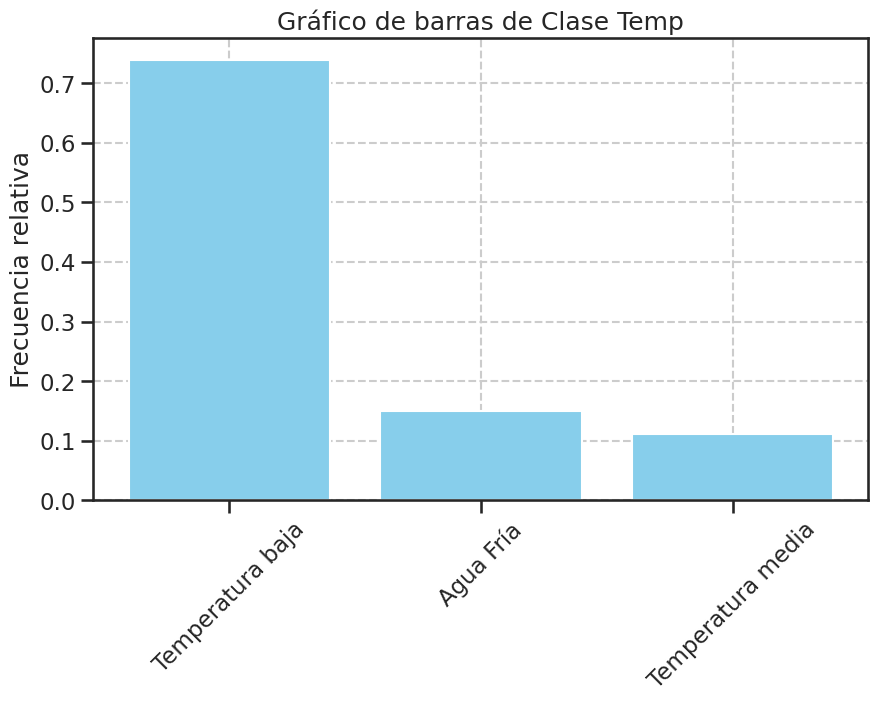

In [34]:
for i in VariablesCatAnalis:
    plt.figure(figsize=(10, 6))
    frecuencia_relativa = df[i].value_counts(normalize=True)
    plt.bar(frecuencia_relativa.index, frecuencia_relativa.values, color='skyblue')
    plt.ylabel('Frecuencia relativa')
    plt.title('Gráfico de barras de ' + i)
    plt.xticks(rotation=45)  # Mejora la legibilidad si hay muchas categorías
    plt.show()

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio </font>**

<font color="DarkBlue"> 1. Crear un DataFrame con los datos de la siguiente liga "https://corgis-edu.github.io/corgis/datasets/csv/earthquakes/earthquakes.csv"
 
Para mas informacion sobre la base de datos : https://corgis-edu.github.io/corgis/csv/earthquakes/
    
<font color="DarkBlue"> 2. Realizar la limpieza y organizacion de los datos.
    
<font color="DarkBlue"> 3. Elijan 3 o 4 variables contínuas y 1 o 2 variables categóricas para hacer el AED.
    
---

In [56]:
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/earthquakes/earthquakes.csv')

In [57]:
df

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
0,nc72666881,122.00,1.43,31,15.12,0.10340,"13km E of Livermore, California",37.672333,-121.619000,California,27,1469593183550,2016-07-27 00:19:43,0,19,7,43,2016
1,us20006i0y,30.00,4.90,371,97.07,1.43900,"58km WNW of Pakokku, Burma",21.514600,94.572100,Burma,27,1469593228220,2016-07-27 00:20:28,0,20,7,28,2016
2,nc72666891,249.00,0.06,0,4.39,0.02743,"12km SE of Mammoth Lakes, California",37.576500,-118.859167,California,27,1469593897150,2016-07-27 00:31:37,0,31,7,37,2016
3,nc72666896,122.00,0.40,2,1.09,0.02699,"6km SSW of Mammoth Lakes, California",37.595833,-118.994833,California,27,1469594144150,2016-07-27 00:35:44,0,35,7,44,2016
4,nn00553447,113.61,0.30,1,7.60,0.06300,"16km SSE of Mogul, Nevada",39.377500,-119.845000,Nevada,27,1469594519667,2016-07-27 00:41:59,0,41,7,59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,nc72685246,47.00,2.42,90,4.85,0.06167,"22km ENE of Soledad, California",36.515499,-121.099831,California,25,1472181541970,2016-08-25 23:19:01,23,19,8,1,2016
8390,ak13879193,0.00,1.40,30,50.00,0.00000,"5km ESE of Big Lake, Alaska",61.498400,-149.862700,Alaska,25,1472181558000,2016-08-25 23:19:18,23,19,8,18,2016
8391,nc72685251,165.00,1.06,17,1.73,0.02042,"6km WNW of The Geysers, California",38.805000,-122.821503,California,25,1472182205600,2016-08-25 23:30:05,23,30,8,5,2016
8392,ci37672328,103.00,1.55,37,29.25,0.06980,"6km NNW of Chatsworth, CA",34.308000,-118.635333,California,25,1472182571880,2016-08-25 23:36:11,23,36,8,11,2016


In [58]:
df.columns

Index(['id', 'impact.gap', 'impact.magnitude', 'impact.significance',
       'location.depth', 'location.distance', 'location.full',
       'location.latitude', 'location.longitude', 'location.name', 'time.day',
       'time.epoch', 'time.full', 'time.hour', 'time.minute', 'time.month',
       'time.second', 'time.year'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8394 non-null   object 
 1   impact.gap           8394 non-null   float64
 2   impact.magnitude     8394 non-null   float64
 3   impact.significance  8394 non-null   int64  
 4   location.depth       8394 non-null   float64
 5   location.distance    8394 non-null   float64
 6   location.full        8394 non-null   object 
 7   location.latitude    8394 non-null   float64
 8   location.longitude   8394 non-null   float64
 9   location.name        8394 non-null   object 
 10  time.day             8394 non-null   int64  
 11  time.epoch           8394 non-null   int64  
 12  time.full            8394 non-null   object 
 13  time.hour            8394 non-null   int64  
 14  time.minute          8394 non-null   int64  
 15  time.month           8394 non-null   i


<div class="alert alert-block alert-info">
<b>Nota:</b> La variable 'impact.magnitude' **NO** puede usarse como variable categórica debido a que tiene valores reales. 
Si alguien la usó como categórica, por eso no sale el gráfico de barras. 
</div>


In [60]:
# 4. Conversipn del tipo de dato
conv = {#diccionario donde a cada llave se le pone el tipo de variable que se quieres
    'impact.significance': 'category',
    'location.name': 'category'
}
# Aplicando la conversión de tipos de acuerdo al diccionario
df = df.astype(conv)
df

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year
0,nc72666881,122.00,1.43,31,15.12,0.10340,"13km E of Livermore, California",37.672333,-121.619000,California,27,1469593183550,2016-07-27 00:19:43,0,19,7,43,2016
1,us20006i0y,30.00,4.90,371,97.07,1.43900,"58km WNW of Pakokku, Burma",21.514600,94.572100,Burma,27,1469593228220,2016-07-27 00:20:28,0,20,7,28,2016
2,nc72666891,249.00,0.06,0,4.39,0.02743,"12km SE of Mammoth Lakes, California",37.576500,-118.859167,California,27,1469593897150,2016-07-27 00:31:37,0,31,7,37,2016
3,nc72666896,122.00,0.40,2,1.09,0.02699,"6km SSW of Mammoth Lakes, California",37.595833,-118.994833,California,27,1469594144150,2016-07-27 00:35:44,0,35,7,44,2016
4,nn00553447,113.61,0.30,1,7.60,0.06300,"16km SSE of Mogul, Nevada",39.377500,-119.845000,Nevada,27,1469594519667,2016-07-27 00:41:59,0,41,7,59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,nc72685246,47.00,2.42,90,4.85,0.06167,"22km ENE of Soledad, California",36.515499,-121.099831,California,25,1472181541970,2016-08-25 23:19:01,23,19,8,1,2016
8390,ak13879193,0.00,1.40,30,50.00,0.00000,"5km ESE of Big Lake, Alaska",61.498400,-149.862700,Alaska,25,1472181558000,2016-08-25 23:19:18,23,19,8,18,2016
8391,nc72685251,165.00,1.06,17,1.73,0.02042,"6km WNW of The Geysers, California",38.805000,-122.821503,California,25,1472182205600,2016-08-25 23:30:05,23,30,8,5,2016
8392,ci37672328,103.00,1.55,37,29.25,0.06980,"6km NNW of Chatsworth, CA",34.308000,-118.635333,California,25,1472182571880,2016-08-25 23:36:11,23,36,8,11,2016


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   8394 non-null   object  
 1   impact.gap           8394 non-null   float64 
 2   impact.magnitude     8394 non-null   float64 
 3   impact.significance  8394 non-null   category
 4   location.depth       8394 non-null   float64 
 5   location.distance    8394 non-null   float64 
 6   location.full        8394 non-null   object  
 7   location.latitude    8394 non-null   float64 
 8   location.longitude   8394 non-null   float64 
 9   location.name        8394 non-null   category
 10  time.day             8394 non-null   int64   
 11  time.epoch           8394 non-null   int64   
 12  time.full            8394 non-null   object  
 13  time.hour            8394 non-null   int64   
 14  time.minute          8394 non-null   int64   
 15  time.month           

In [62]:
variablesnum= ['impact.gap', 'impact.magnitude', 'location.depth','location.distance']


estadist = pd.DataFrame()
for variable in variablesnum:
    df_est = estadigrafos(df, variable)
    estadist = pd.concat([estadist, df_est], axis = 1)

estadist


,impact.gap,impact.magnitude,location.depth,location.distance
Mínimo,0.00,0.01,-3.39,0.00
Primer Cuartil,57.00,0.74,3.80,0.01
Promedio,111.83,1.51,23.05,0.38
Mediana,96.00,1.20,8.90,0.05
Tercer Cuartil,156.00,1.88,15.80,0.17
Máximo,358.00,7.70,622.13,40.55
Varianza,6627.65,1.33,2609.32,2.40
Desviación Estandar,81.41,1.15,51.08,1.55
Rango,358.00,7.69,625.52,40.55
IQR,99.00,1.14,12.00,0.16


In [63]:
for i in variablesnum:#obtiene moda de los datos
    print(i , 'moda =' ,df[i].mode())

impact.gap moda = 0    0.0
Name: impact.gap, dtype: float64
impact.magnitude moda = 0    1.1
Name: impact.magnitude, dtype: float64
location.depth moda = 0    10.0
Name: location.depth, dtype: float64
location.distance moda = 0    0.0
Name: location.distance, dtype: float64


In [64]:
variablescat = ['impact.significance','location.name' ]

In [65]:
df[variablescat].describe()

,impact.significance,location.name
count,8394,8394
unique,268,118
top,1,California
freq,407,3609


In [66]:
def HistBox(variables, df):
    plt.figure(figsize=(20, 20))
    outer_grid = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.4)
    custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
    sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
    sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})

    for i, variable in enumerate(variables):
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                      subplot_spec=outer_grid[i],
                                                      height_ratios=[4, 1],
                                                      hspace=0.02)  # Ajustado para minimizar el espacio entre histogramas y boxplots

        # Histograma
        ax_hist = plt.Subplot(plt.gcf(), inner_grid[0])
        sns.histplot(df[variable], kde=True, stat='density', color='yellowgreen', ax=ax_hist)
        ax_hist.set_title(variable)
        ax_hist.set_xlabel('')  # Mantener esto para limpieza
        plt.gcf().add_subplot(ax_hist)
        ax_hist.tick_params(axis='x',          # Cambios para ocultar solo los ticks (no las etiquetas, que ya están ocultas)
                            which='both',      # Afecta a ticks mayores y menores
                            bottom=False,      # Oculta ticks inferiores
                            top=False,         # Oculta ticks superiores (si estuvieran visibles)
                            labelbottom=False) # Oculta las etiquetas de los ticks inferiores
        # Calcula y anota estadísticas
        mean = df[variable].mean()
        median = df[variable].median()
        mode = df[variable].mode()[0]  # Moda
        max_value = df[variable].max()
        min_value = df[variable].min()

        # Agrega líneas verticales para cada estadística
        lines = [
            ax_hist.axvline(mean, color='red', linestyle='dashed', linewidth=2),
            ax_hist.axvline(median, color='green', linestyle='dashed', linewidth=2)#,
        ]

        ax_hist.grid(True)

        # Boxplot
        ax_box = plt.Subplot(plt.gcf(), inner_grid[1], sharex=ax_hist)
        sns.boxplot(x=df[variable], ax=ax_box, color='lightgreen', showmeans=True,
                    meanprops={"marker":"o", "markerfacecolor":'red',
                               "markeredgecolor":"gray", "markersize":"10"})
        ax_box.set_xlabel('')
        ax_box.tick_params(axis='x',          # Cambios para ocultar solo los ticks (no las etiquetas, que ya están ocultas)
                            which='both',      # Afecta a ticks mayores y menores
                            bottom=True,      # Oculta ticks inferiores
                            top=True,         # Oculta ticks superiores (si estuvieran visibles)
                            labelbottom=True)
        plt.gcf().add_subplot(ax_box)

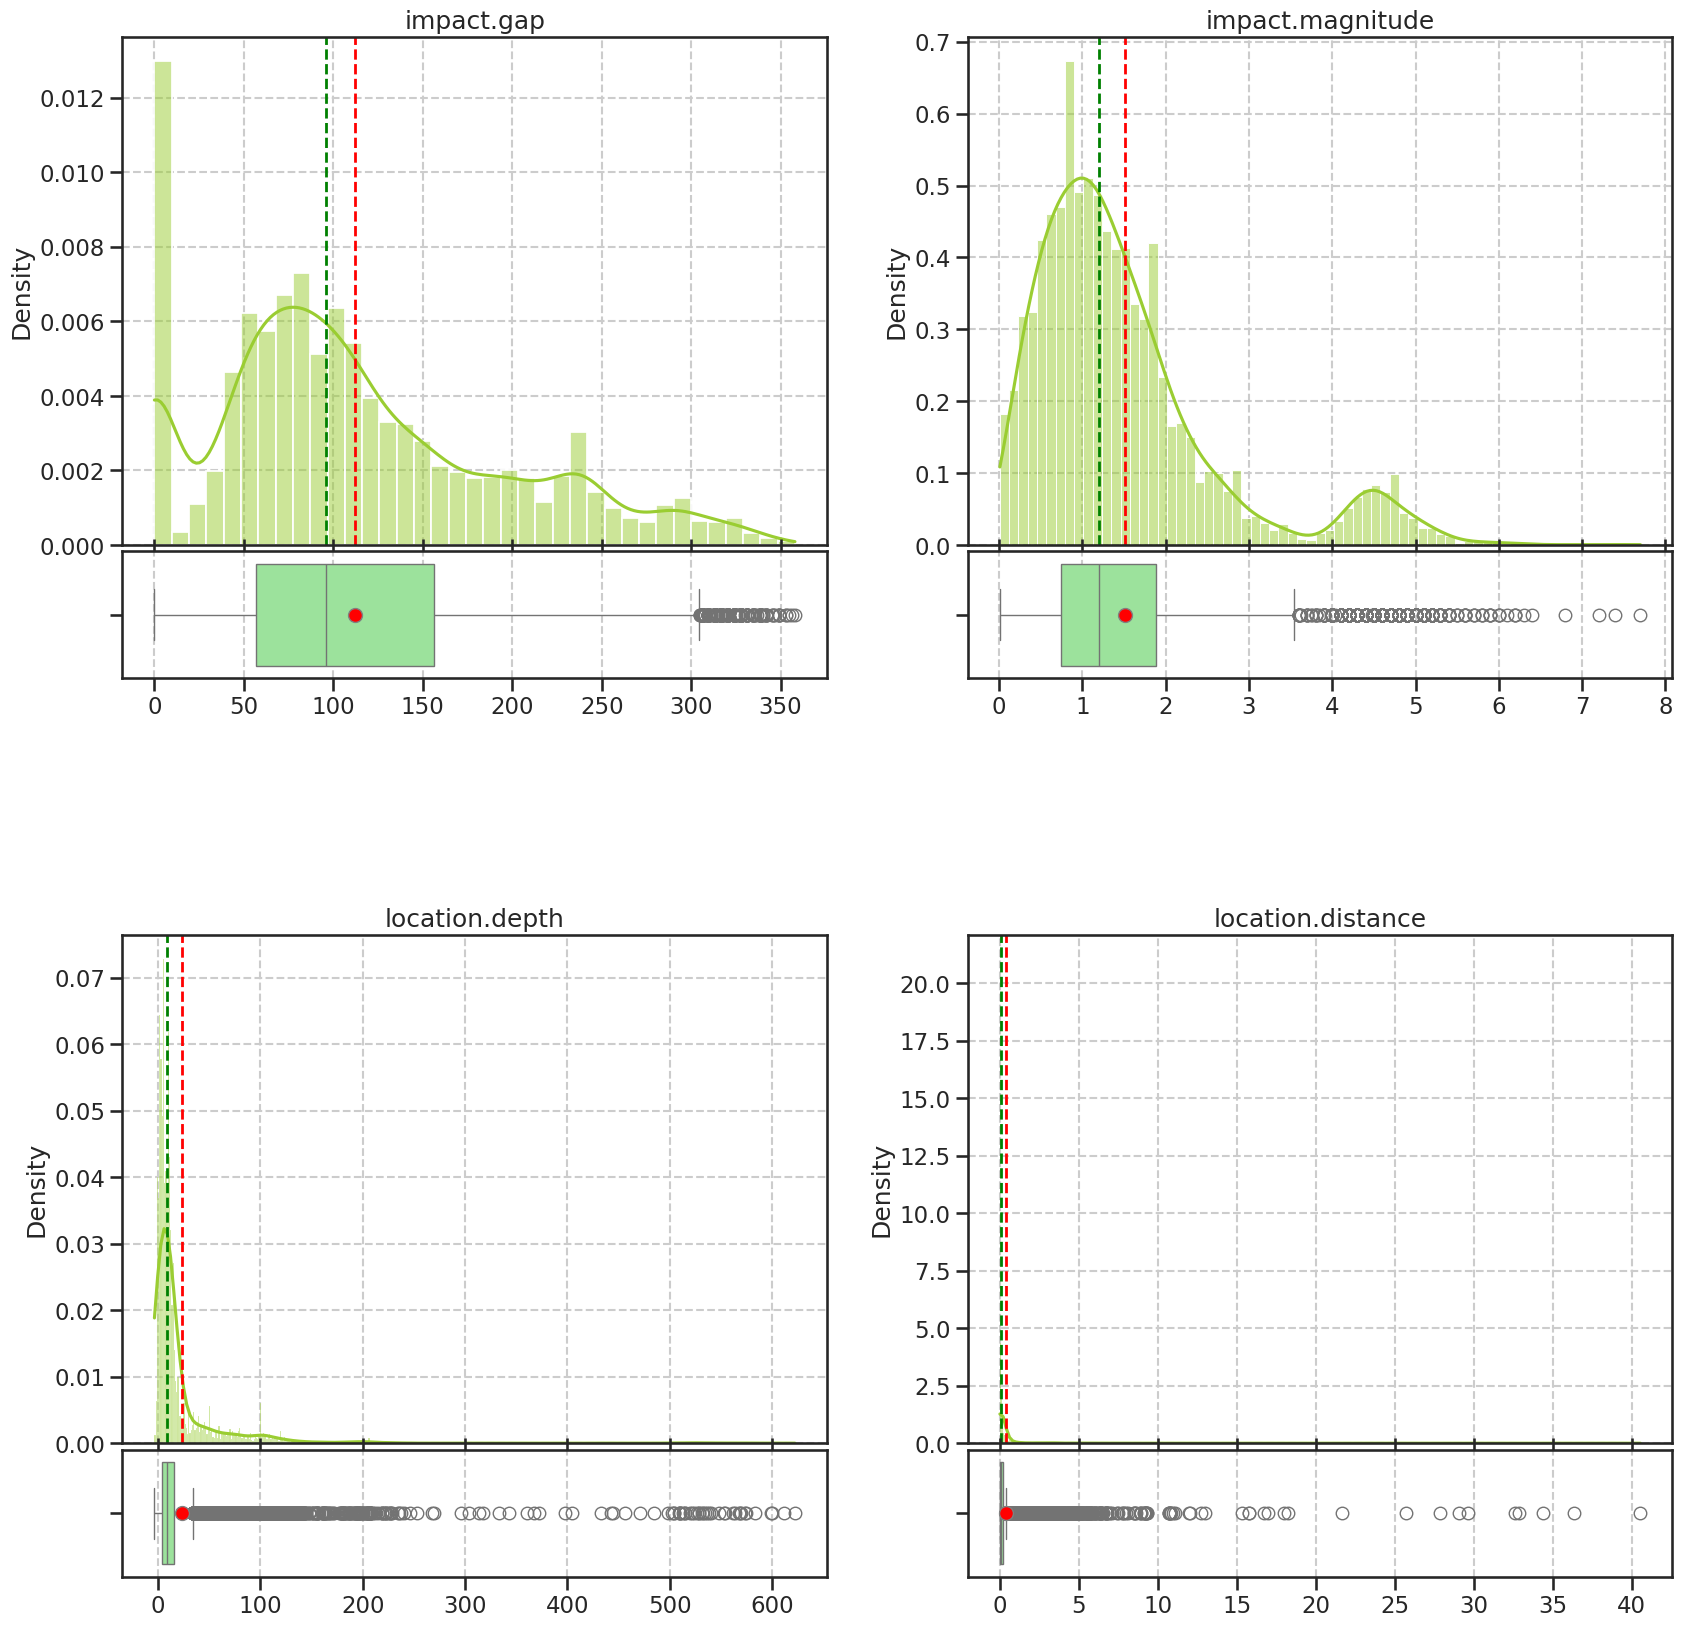

In [67]:
HistBox(variablesnum, df)

In [68]:
variablescat

['impact.significance', 'location.name']

<div class="alert alert-block alert-info">
<b>Nota:</b> Con el co
</div>

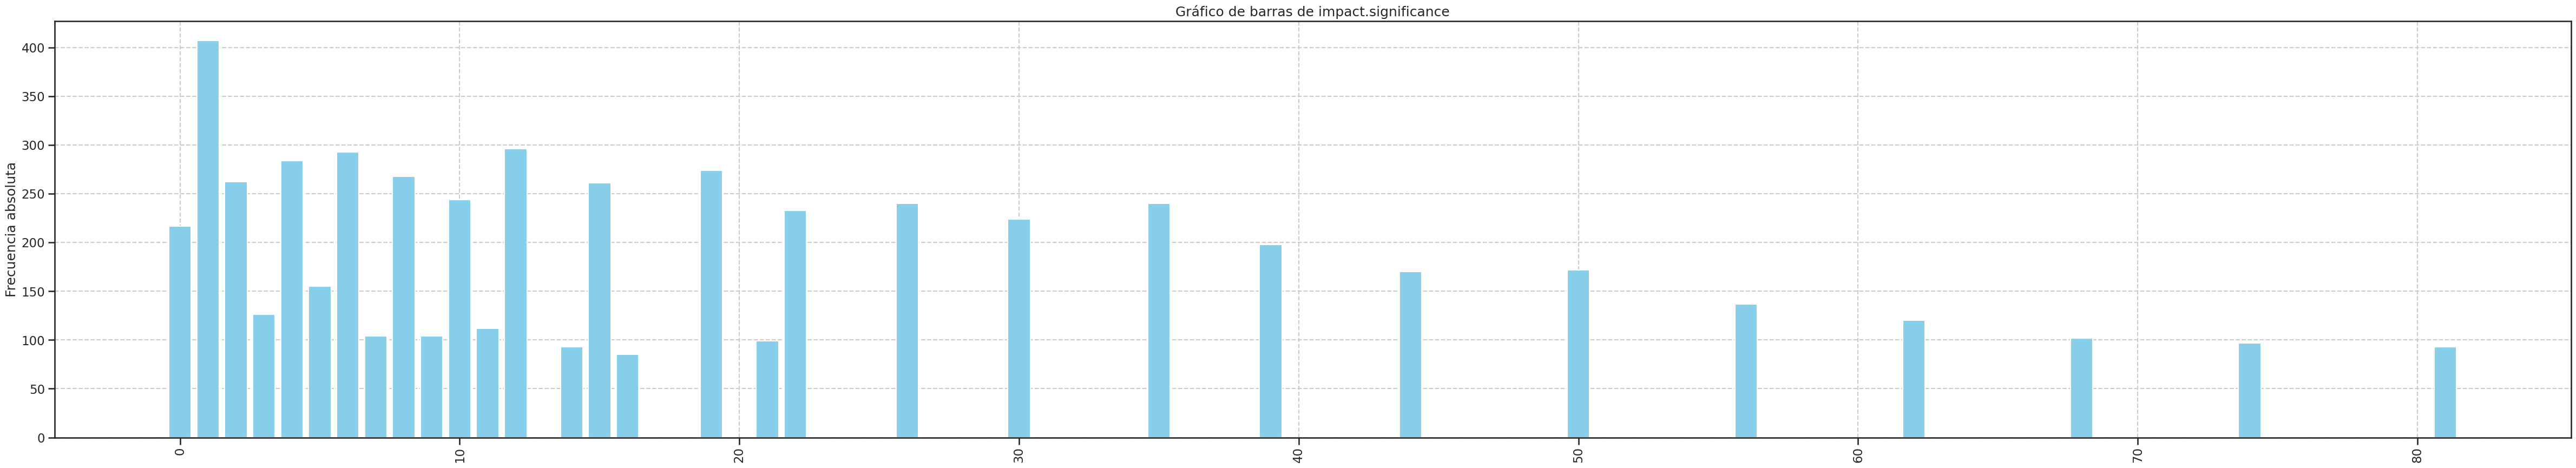

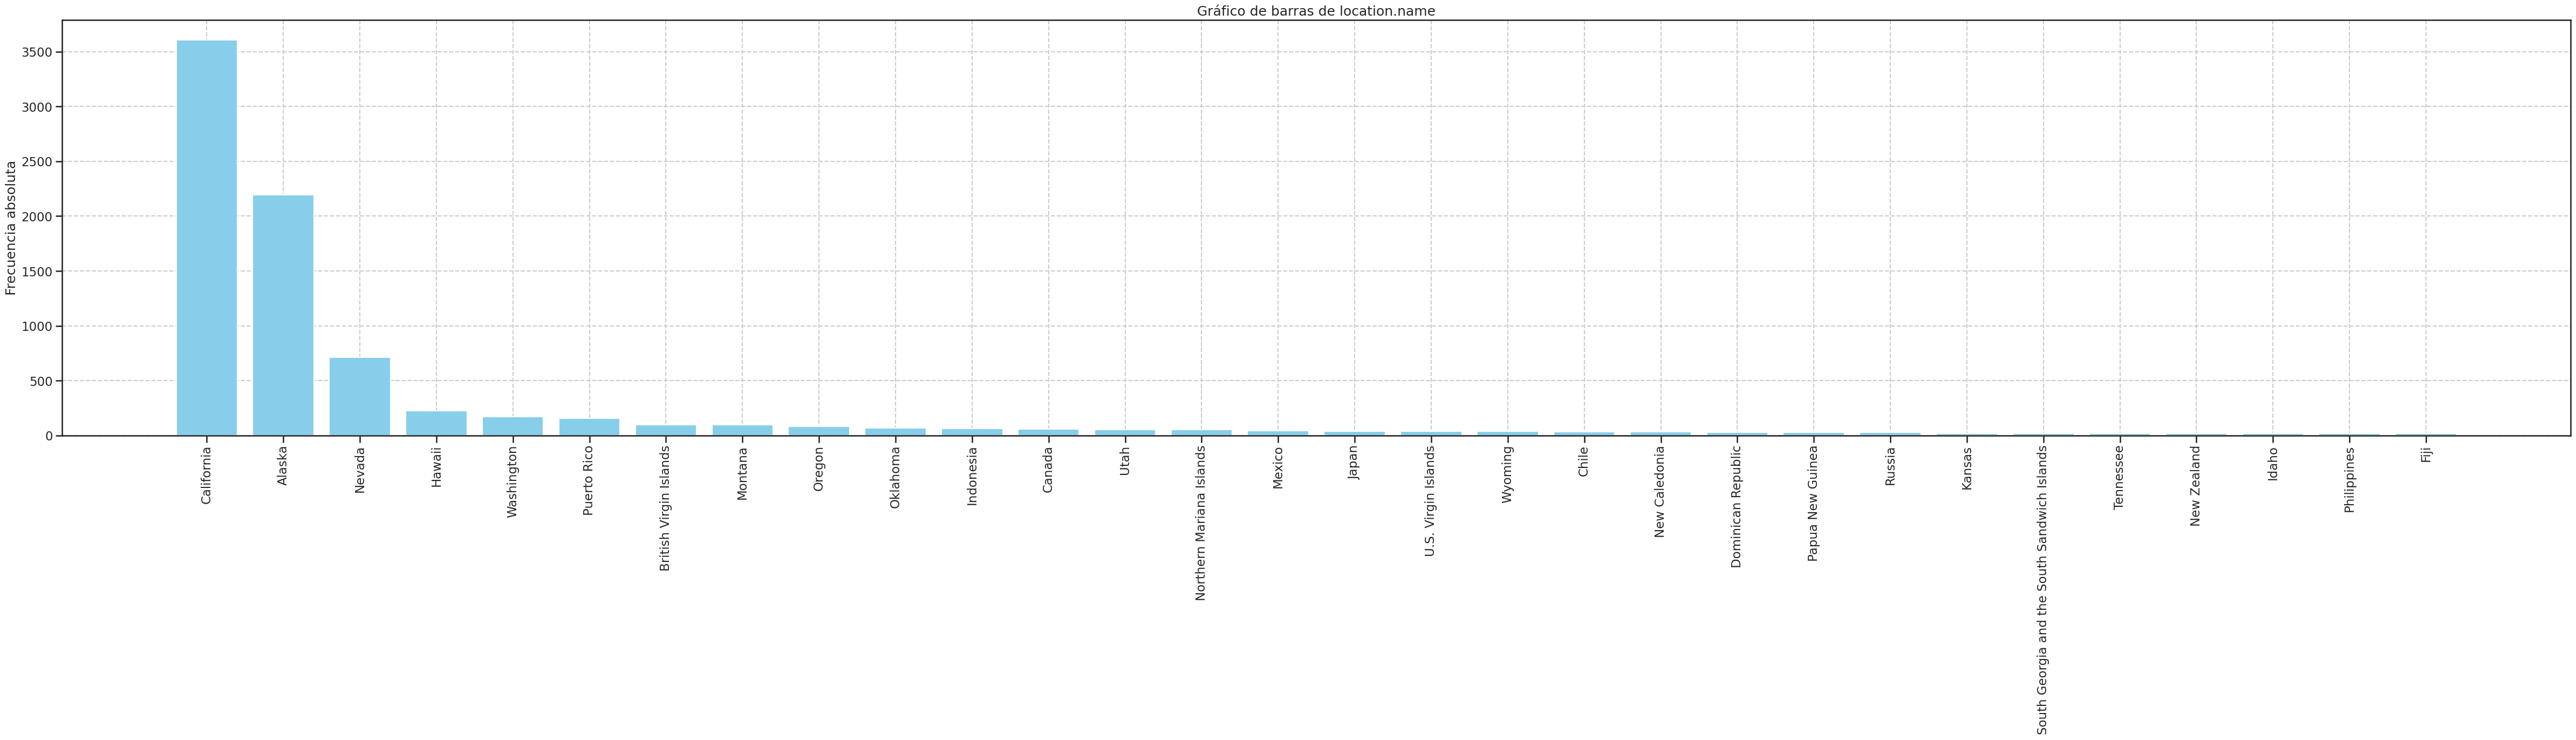

In [72]:
for i in variablescat:
    # Contar frecuencia y seleccionar las 30 más comunes
    top_n = 30
    frecuencias = df[i].value_counts().nlargest(top_n)
    
    plt.figure(figsize=(60, 10))
    #conteo = df[i].value_counts()
    plt.bar(frecuencias.index, frecuencias.values, color='skyblue')
    plt.ylabel('Frecuencia absoluta')
    plt.title('Gráfico de barras de ' + i)
    plt.xticks(rotation=90)  # opcional, mejora la legibilidad
    plt.show()